In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_theme(style="dark") # cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros.
plt.style.use('Solarize_Light2')# establece el estilo en Solarize_Lihgt2.

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("raw_data_final_20231212.csv", index_col = 0 ) 
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,3,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,4,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,2,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,4,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,3,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


# GRÁFICOS PRESENTACIÓN BBDD 

### Distribución de edades por género

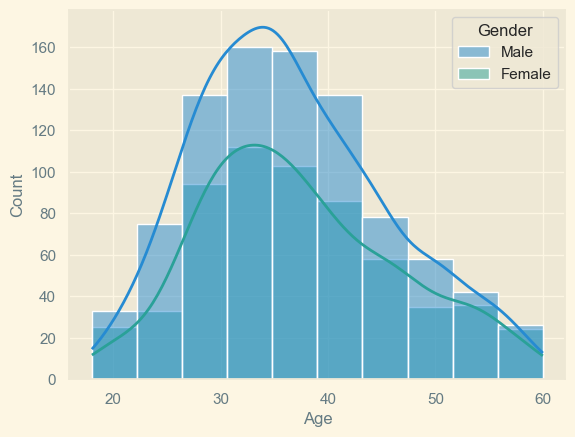

In [3]:
sns.histplot(x = "Age", 
             data = df, 
             hue = 'Gender',
             color = "violet", 
             kde = True, 
             bins = 10 );

### Job level distribution

In [4]:
df_joblevel = df.groupby("Joblevel")["Employeenumber"].count().reset_index()
df_joblevel

,Joblevel,Employeenumber
0,Entry-level,555
1,Executive,70
2,Junior,546
3,Mid-level,228
4,Senior,111


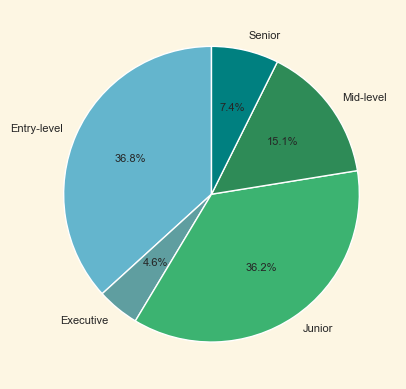

In [5]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Employeenumber", labels= "Joblevel",
        data = df_joblevel, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

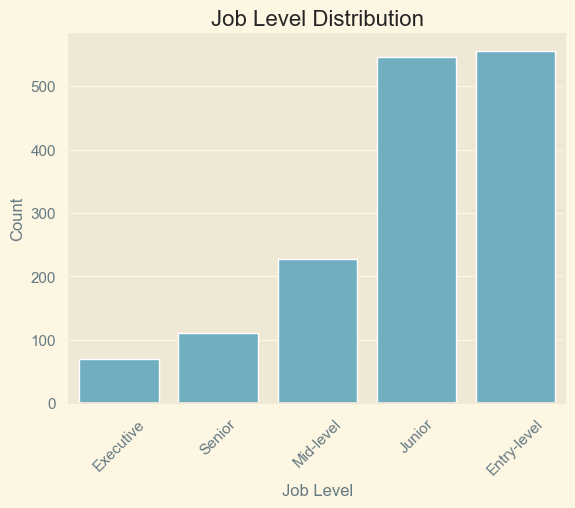

In [6]:
sns.countplot(x = "Joblevel", 
              data = df, 
              color = "c");

plt.xticks(rotation = 45)
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.title("Job Level Distribution");


### Education level distribution 

In [7]:
def education_level(dataframe):
    dict_map = {1: "Elementary School", 2: "Middle School", 3: "High School", 4: "College/University", 5: "Graduate School"}
    dataframe["Education"] = dataframe["Education"].map(dict_map)
    return dataframe
df= education_level(df)

In [8]:
df["Education"].value_counts()

Education
High School           585
College/University    411
Middle School         293
Elementary School     172
Graduate School        49
Name: count, dtype: int64

In [9]:
df_educacion = df.groupby("Education")["Employeenumber"].count().reset_index()
df_educacion

,Education,Employeenumber
0,College/University,411
1,Elementary School,172
2,Graduate School,49
3,High School,585
4,Middle School,293


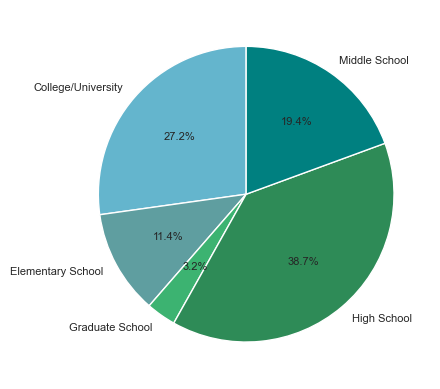

In [10]:
sns.set(style="whitegrid")
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Employeenumber", labels= "Education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

''

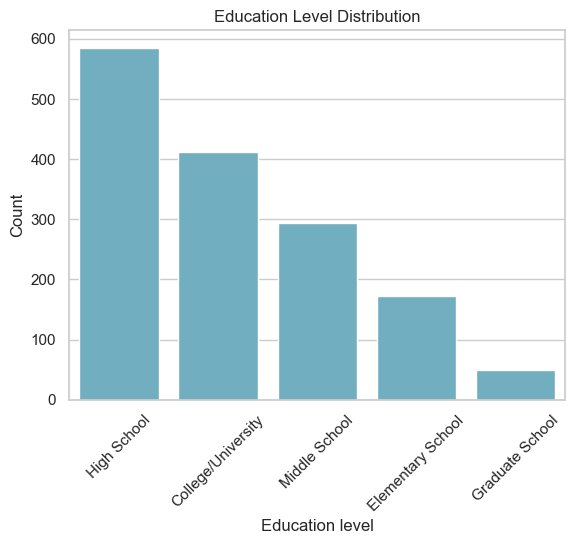

In [11]:
sns.countplot(x = "Education", 
              data = df, 
              color = "c");


plt.xlabel("Education level")
plt.ylabel("Count")
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
;

# GRÁFICOS EN BASE a vars que no hacemos en el AB testing

In [12]:
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,High School,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,College/University,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,Middle School,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,College/University,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,High School,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


In [13]:
df.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Department', 'Education',
       'Educationfield', 'Employeenumber', 'Environmentsatisfaction', 'Gender',
       'Jobinvolvement', 'Joblevel', 'Jobrole', 'Jobsatisfaction',
       'Maritalstatus', 'Monthlyrate', 'Numcompaniesworked', 'Overtime',
       'Percentsalaryhike', 'Relationshipsatisfaction', 'Stockoptionlevel',
       'Trainingtimeslastyear', 'Yearsatcompany', 'Yearssincelastpromotion',
       'Yearswithcurrmanager', 'Datebirth', 'Remotework', 'Dailyrate',
       'Distancefromhome', 'Monthlyincome', 'Performancerating',
       'Totalworkingyears', 'Worklifebalance', 'Hourlyrate'],
      dtype='object')

In [14]:
mediana_salario_hombres = df[df['Gender'] == 'Male']['Monthlyincome'].median()
mediana_salario_mujeres = df[df['Gender'] == 'Female']['Monthlyincome'].median()

In [15]:
mediana_salario_hombres = df[df['Gender'] == 'Male']['Monthlyincome'].median()
mediana_salario_mujeres = df[df['Gender'] == 'Female']['Monthlyincome'].median()
print(f"La mediana de salario para hombres es: {mediana_salario_hombres}")
print(f"La mediana de salario para mujeres es: {mediana_salario_mujeres}")

La mediana de salario para hombres es: 5336.2
La mediana de salario para mujeres es: 5496.0


NEXT STEPS -- EXTRA a compara aparte de los requisitos: 

- Satisfiacción con el trabajo (Jobsatisfaction) 
- Environment satisfaction 

Relación salario y años en la compañia

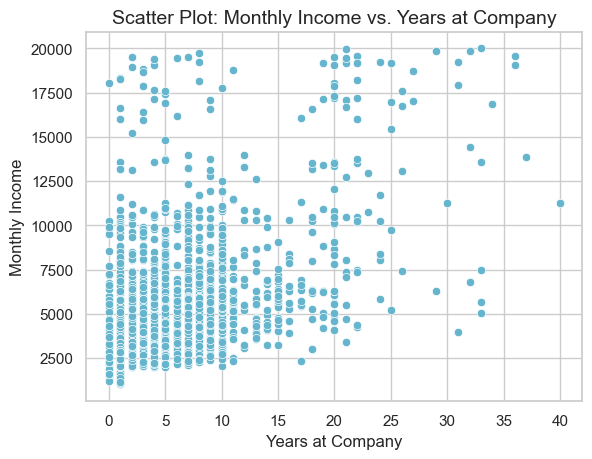

In [16]:
sns.scatterplot(x="Yearsatcompany", y="Monthlyincome", data=df, color="c")

# Cambia las etiquetas de los ejes
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

plt.title('Scatter Plot: Monthly Income vs. Years at Company', fontsize=14)

plt.show()

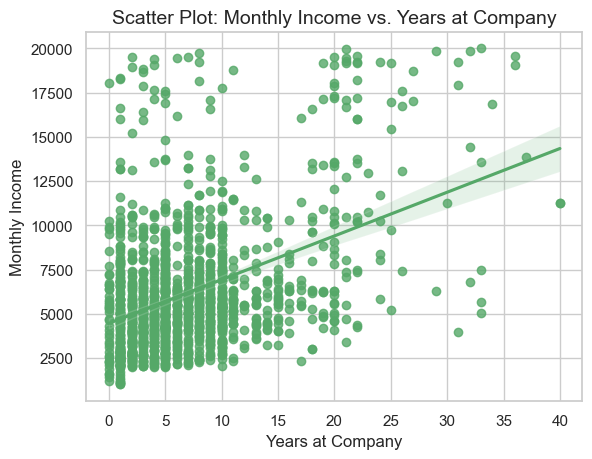

In [17]:
sns.regplot(x="Yearsatcompany", y="Monthlyincome", data=df, color="g")

# Cambia las etiquetas de los ejes
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Monthly Income", fontsize=12)

plt.title('Scatter Plot: Monthly Income vs. Years at Company', fontsize=14)

plt.show()

Comparamos años en la compañia y "rango" laboral

/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_4076/2891552077.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Yearsatcompany",


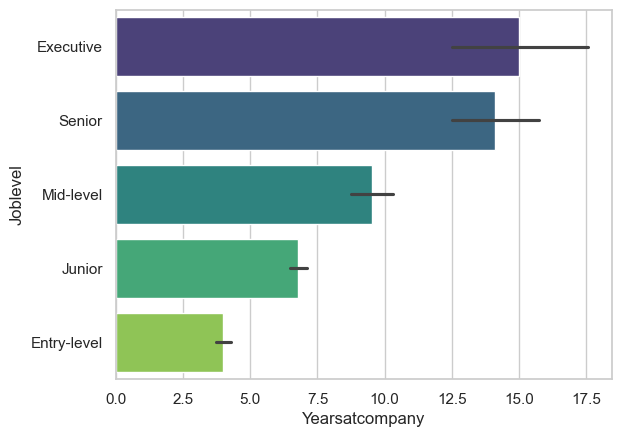

In [18]:
sns.barplot(x = "Yearsatcompany",
            y = "Joblevel",
            data = df,
            palette = "viridis");

In [19]:
df.groupby("Joblevel")["Yearsatcompany"].mean()

Joblevel
Entry-level     3.985586
Executive      14.985714
Junior          6.780220
Mid-level       9.526316
Senior         14.099099
Name: Yearsatcompany, dtype: float64

## SATISFACTIONS NO NOS APORTABAN NADA INTERESANTE

In [ ]:
media_por_grupo = df.groupby(["Joblevel", "Jobsatisfaction"]).mean()
media_por_grupo

In [ ]:
satisfaccion_filtrada = df[df['Jobsatisfaction'].isin(['Satisfied', 'Very Satisfied'])]
grupo_por_joblevel = satisfaccion_filtrada.groupby('Joblevel').size()
print(grupo_por_joblevel)

Joblevel
Entry-level    336
Executive       43
Junior         342
Mid-level      140
Senior          64
dtype: int64


In [ ]:
satisfaccion_filtrada2 = df[df['Jobsatisfaction'].isin(['Somewhat Satisfied', 'Not Satisfied'])]
grupo_por_joblevel = satisfaccion_filtrada2.groupby('Joblevel').size()
print(grupo_por_joblevel)

Joblevel
Entry-level    219
Executive       27
Junior         204
Mid-level       88
Senior          47
dtype: int64


In [ ]:
df[df["Jobsatisfaction"]=="Very Satisfied"]

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
2,42,No,travel_rarely,Research & Development,Middle School,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
5,48,No,Unknown,Research & Development,High School,Medical,1900,Very Satisfied,Female,High,Senior,Manager,Very Satisfied,Unknown,2437,3,No,11,Somewhat Satisfied,1,3,22,4,7,1975,Yes,117.0,22.0,17174.0,3.0,14.4,3.0,58.0
21,33,No,Unknown,Research & Development,Middle School,Life Sciences,73,Not Satisfied,Female,High,Mid-level,Research Director,Very Satisfied,Single,15146,1,Yes,12,Satisfied,0,1,15,8,12,1990,Yes,515.0,1.0,5537.6,3.0,15.0,3.0,98.0
23,47,No,Unknown,Unknown,Middle School,Other,820,Satisfied,Female,High,Senior,Manager,Very Satisfied,Married,12982,1,Unknown,11,Satisfied,1,3,26,3,0,1976,No,202.0,2.0,16752.0,3.0,14.0,2.0,33.0
24,36,No,travel_rarely,Sales,Middle School,Life Sciences,2079,Very Satisfied,Male,High,Junior,Sales Executive,Very Satisfied,Unknown,2823,1,Unknown,14,Very Satisfied,1,1,18,4,11,1987,Yes,928.0,10.2,6201.0,3.0,18.0,3.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,55,Yes,Unknown,Sales,Elementary School,Medical,842,Satisfied,Male,High,Junior,Sales Executive,Very Satisfied,Single,21519,4,Unknown,16,Satisfied,0,3,9,7,3,1968,Yes,436.0,2.0,7416.2,3.0,16.8,2.0,37.0
1604,41,Yes,Unknown,Research & Development,College/University,Life Sciences,927,Somewhat Satisfied,Female,Low,Entry-level,Laboratory Technician,Very Satisfied,Divorced,17725,4,Yes,13,Satisfied,1,1,7,1,0,1982,Yes,1085.0,2.0,12335.8,3.0,20.6,2.0,63.8
1607,31,No,Unknown,Research & Development,High School,Medical,2497,Very Satisfied,Female,High,Junior,Healthcare Representative,Very Satisfied,Unknown,17369,0,Unknown,11,Satisfied,2,2,9,8,5,1992,Yes,616.0,12.0,5665.2,3.0,10.0,1.0,41.0
1609,36,Yes,travel_rarely,Sales,Elementary School,Life Sciences,967,Satisfied,Male,Moderate,Mid-level,Sales Executive,Very Satisfied,Married,5518,1,Unknown,11,Not Satisfied,1,6,16,3,7,1987,No,530.0,3.0,10325.0,3.4,16.8,3.0,51.0


Satisfacción y joblevel

/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_4076/3498585636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jobsatisfaction', data=df, palette='viridis')


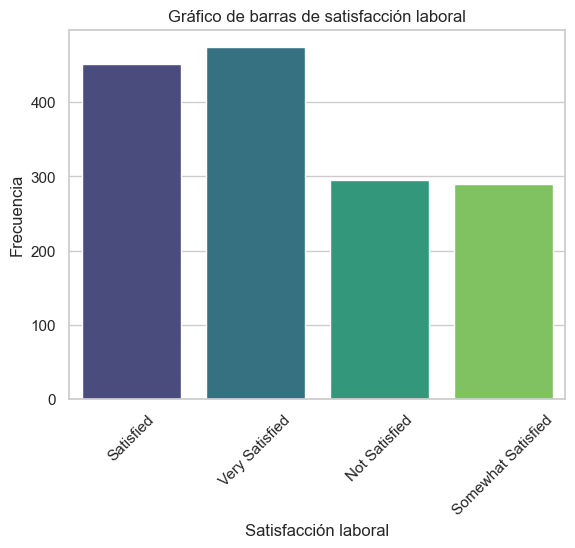

In [22]:
sns.countplot(x='Jobsatisfaction', data=df, palette='viridis') 
plt.title('Gráfico de barras de satisfacción laboral')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show();

In [ ]:
df["Department"].value_counts()

Research & Development    945
Sales                     425
Unknown                    86
Human Resources            54
Name: Department, dtype: int64